In [1]:
import pandas as pd

df = pd.read_csv(r"C:\\Contents\\Kaggle\\Machine-Learning-for-Cybersecurity-Cookbook-master\\Machine-Learning-for-Cybersecurity-Cookbook-master\\Chapter01\\Standardizing Your Data\\file_pe_headers.csv")

df.head()



,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [2]:
Y = df['Malware'].values
X = df.drop(['Name', 'Malware'], axis = 1).values

In [5]:
X[0], Y[0], X.shape

(array([2.31170000e+04, 1.44000000e+02, 3.00000000e+00, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 6.55350000e+04, 0.00000000e+00,
        1.84000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.40000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.48000000e+02, 3.44040000e+04, 6.00000000e+00, 1.23651236e+09,
        0.00000000e+00, 0.00000000e+00, 2.40000000e+02, 3.40000000e+01,
        5.23000000e+02, 8.00000000e+00, 0.00000000e+00, 5.47840000e+04,
        1.89440000e+05, 0.00000000e+00, 5.13160000e+04, 4.09600000e+03,
        4.29496730e+09, 4.09600000e+03, 5.12000000e+02, 6.00000000e+00,
        0.00000000e+00, 6.00000000e+00, 0.00000000e+00, 5.00000000e+00,
        2.00000000e+00, 1.02400000e+03, 2.95281000e+05, 2.74432000e+05,
        2.00000000e+00, 3.28320000e+04, 5.24288000e+05, 8.19200000e+03,
        1.04857600e+06, 4.09600000e+03, 0.00000000e+00, 1.60000000e+01,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 0.000000

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 42)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(78, input_dim = 77, activation="relu", kernel_initializer="normal"))
model.add(Dense(16, activation="sigmoid", kernel_initializer="normal"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 78)                6084      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1264      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 7,365
Trainable params: 7,365
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 25, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/25
13727/13727 [==============================] - 1s 64us/step - loss: 0.5628 - accuracy: 0.7409 - val_loss: 0.5090 - val_accuracy: 0.8006
Epoch 2/25
13727/13727 [==============================] - 1s 39us/step - loss: 0.4972 - accuracy: 0.7981 - val_loss: 0.4864 - val_accuracy: 0.7809
Epoch 3/25
13727/13727 [==============================] - 1s 40us/step - loss: 0.4817 - accuracy: 0.7791 - val_loss: 0.4752 - val_accuracy: 0.7779
Epoch 4/25
13727/13727 [==============================] - 1s 39us/step - loss: 0.4730 - accuracy: 0.7768 - val_loss: 0.4684 - val_accuracy: 0.7779
Epoch 5/25
13727/13727 [==============================] - 1s 40us/step - loss: 0.4673 - accuracy: 0.7799 - val_loss: 0.4631 - val_accuracy: 0.7828
Epoch 6/25
13727/13727 [==============================] - 1s 39us/step - loss: 0.4630 - accuracy: 0.7821 - val_loss: 0.4592 - val_accuracy: 0.7828
Epoch 7/25
13727/13727 [==============================] - 1s 40us/ste

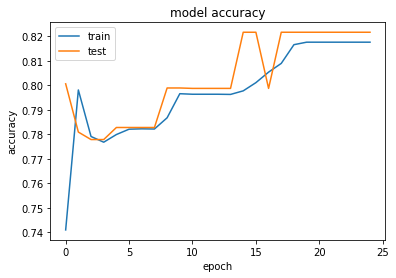

In [17]:
import matplotlib.pyplot as plt


%matplotlib inline


#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


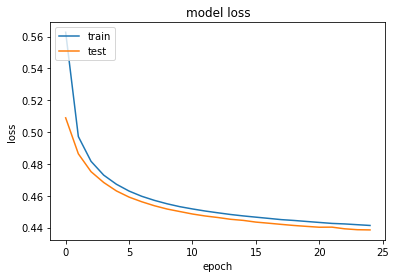

In [18]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [19]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(78, input_dim = 77, activation="relu", kernel_initializer="normal"))
model.add(Dense(32, activation="sigmoid", kernel_initializer="normal"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 78)                6084      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2528      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 8,645
Trainable params: 8,645
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 40, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/40
13727/13727 [==============================] - 1s 69us/step - loss: 0.5101 - accuracy: 0.7614 - val_loss: 0.4656 - val_accuracy: 0.7838
Epoch 2/40
13727/13727 [==============================] - 1s 46us/step - loss: 0.4487 - accuracy: 0.7914 - val_loss: 0.4315 - val_accuracy: 0.7954
Epoch 3/40
13727/13727 [==============================] - 1s 46us/step - loss: 0.4205 - accuracy: 0.8010 - val_loss: 0.4083 - val_accuracy: 0.8044
Epoch 4/40
13727/13727 [==============================] - 1s 46us/step - loss: 0.3999 - accuracy: 0.8084 - val_loss: 0.3905 - val_accuracy: 0.8115
Epoch 5/40
13727/13727 [==============================] - 1s 47us/step - loss: 0.3847 - accuracy: 0.8122 - val_loss: 0.3772 - val_accuracy: 0.8107
Epoch 6/40
13727/13727 [==============================] - 1s 48us/step - loss: 0.3731 - accuracy: 0.8163 - val_loss: 0.3670 - val_accuracy: 0.8289
Epoch 7/40
13727/13727 [==============================] - 1s 46us/ste

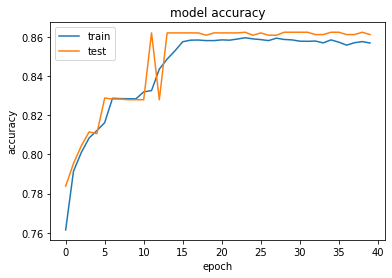

In [21]:

#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


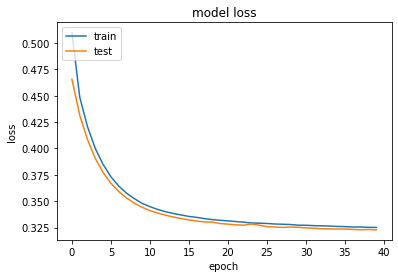

In [22]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [23]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim = 77, activation="sigmoid", kernel_initializer="normal"))
model.add(Dense(32, activation="sigmoid", kernel_initializer="normal"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                4992      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 40, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/40
13727/13727 [==============================] - 1s 72us/step - loss: 0.4618 - accuracy: 0.7852 - val_loss: 0.3708 - val_accuracy: 0.8258
Epoch 2/40
13727/13727 [==============================] - 1s 49us/step - loss: 0.3276 - accuracy: 0.8422 - val_loss: 0.2966 - val_accuracy: 0.8951
Epoch 3/40
13727/13727 [==============================] - 1s 46us/step - loss: 0.2862 - accuracy: 0.8927 - val_loss: 0.2781 - val_accuracy: 0.8945
Epoch 4/40
13727/13727 [==============================] - 1s 49us/step - loss: 0.2762 - accuracy: 0.8936 - val_loss: 0.2745 - val_accuracy: 0.8945
Epoch 5/40
13727/13727 [==============================] - 1s 48us/step - loss: 0.2721 - accuracy: 0.8954 - val_loss: 0.2708 - val_accuracy: 0.8958
Epoch 6/40
13727/13727 [==============================] - 1s 48us/step - loss: 0.2686 - accuracy: 0.8960 - val_loss: 0.2674 - val_accuracy: 0.8958
Epoch 7/40
13727/13727 [==============================] - 1s 49us/ste

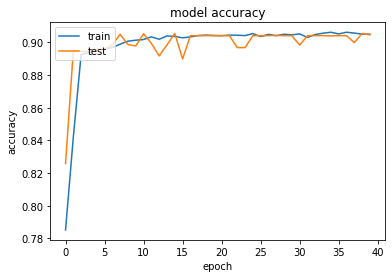

In [25]:

#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


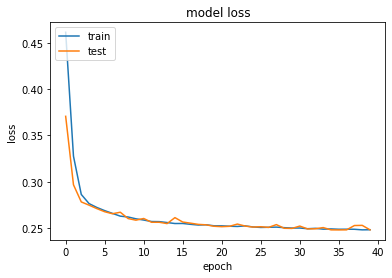

In [26]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [27]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim = 77, activation="sigmoid", kernel_initializer="normal"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                4992      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 100, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/100
13727/13727 [==============================] - 1s 58us/step - loss: 0.4340 - accuracy: 0.7879 - val_loss: 0.3750 - val_accuracy: 0.8278
Epoch 2/100
13727/13727 [==============================] - 1s 41us/step - loss: 0.3503 - accuracy: 0.8336 - val_loss: 0.3322 - val_accuracy: 0.8355
Epoch 3/100
13727/13727 [==============================] - 1s 41us/step - loss: 0.3201 - accuracy: 0.8390 - val_loss: 0.3114 - val_accuracy: 0.8523
Epoch 4/100
13727/13727 [==============================] - 1s 40us/step - loss: 0.3042 - accuracy: 0.8856 - val_loss: 0.3001 - val_accuracy: 0.8931
Epoch 5/100
13727/13727 [==============================] - 1s 42us/step - loss: 0.2947 - accuracy: 0.8943 - val_loss: 0.2920 - val_accuracy: 0.8931
Epoch 6/100
13727/13727 [==============================] - 1s 40us/step - loss: 0.2883 - accuracy: 0.8941 - val_loss: 0.2862 - val_accuracy: 0.8979
Epoch 7/100
13727/13727 [==============================] - 1s 4

Epoch 56/100
13727/13727 [==============================] - 1s 46us/step - loss: 0.2593 - accuracy: 0.9022 - val_loss: 0.2595 - val_accuracy: 0.9019
Epoch 57/100
13727/13727 [==============================] - 1s 46us/step - loss: 0.2593 - accuracy: 0.9025 - val_loss: 0.2591 - val_accuracy: 0.9009
Epoch 58/100
13727/13727 [==============================] - 1s 47us/step - loss: 0.2589 - accuracy: 0.9019 - val_loss: 0.2616 - val_accuracy: 0.8972
Epoch 59/100
13727/13727 [==============================] - 1s 46us/step - loss: 0.2592 - accuracy: 0.9027 - val_loss: 0.2590 - val_accuracy: 0.9019
Epoch 60/100
13727/13727 [==============================] - 1s 46us/step - loss: 0.2590 - accuracy: 0.9027 - val_loss: 0.2591 - val_accuracy: 0.9019
Epoch 61/100
13727/13727 [==============================] - 1s 46us/step - loss: 0.2589 - accuracy: 0.9022 - val_loss: 0.2591 - val_accuracy: 0.9019
Epoch 62/100
13727/13727 [==============================] - 1s 46us/step - loss: 0.2589 - accuracy: 0.9025

In [29]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(78, input_dim = 77, activation="sigmoid", kernel_initializer="uniform"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="uniform"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 78)                6084      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 79        
Total params: 6,163
Trainable params: 6,163
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 100, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/100
13727/13727 [==============================] - 2s 144us/step - loss: 0.4410 - accuracy: 0.7896 - val_loss: 0.3808 - val_accuracy: 0.8287
Epoch 2/100
13727/13727 [==============================] - 1s 91us/step - loss: 0.3574 - accuracy: 0.8330 - val_loss: 0.3355 - val_accuracy: 0.8314
Epoch 3/100
13727/13727 [==============================] - 1s 91us/step - loss: 0.3249 - accuracy: 0.8363 - val_loss: 0.3123 - val_accuracy: 0.8362
Epoch 4/100
13727/13727 [==============================] - 1s 90us/step - loss: 0.3071 - accuracy: 0.8832 - val_loss: 0.2986 - val_accuracy: 0.8856
Epoch 5/100
13727/13727 [==============================] - 1s 83us/step - loss: 0.2963 - accuracy: 0.9001 - val_loss: 0.2895 - val_accuracy: 0.8984
Epoch 6/100
13727/13727 [==============================] - 1s 91us/step - loss: 0.2887 - accuracy: 0.9026 - val_loss: 0.2835 - val_accuracy: 0.9036
Epoch 7/100
13727/13727 [==============================] - 1s 

Epoch 56/100
13727/13727 [==============================] - 1s 90us/step - loss: 0.2415 - accuracy: 0.9105 - val_loss: 0.2440 - val_accuracy: 0.9084
Epoch 57/100
13727/13727 [==============================] - 1s 93us/step - loss: 0.2413 - accuracy: 0.9105 - val_loss: 0.2440 - val_accuracy: 0.9084
Epoch 58/100
13727/13727 [==============================] - 1s 93us/step - loss: 0.2410 - accuracy: 0.9110 - val_loss: 0.2457 - val_accuracy: 0.9079
Epoch 59/100
13727/13727 [==============================] - 1s 94us/step - loss: 0.2413 - accuracy: 0.9104 - val_loss: 0.2447 - val_accuracy: 0.9099
Epoch 60/100
13727/13727 [==============================] - 1s 94us/step - loss: 0.2408 - accuracy: 0.9105 - val_loss: 0.2438 - val_accuracy: 0.9081
Epoch 61/100
13727/13727 [==============================] - 1s 94us/step - loss: 0.2407 - accuracy: 0.9104 - val_loss: 0.2433 - val_accuracy: 0.9084
Epoch 62/100
13727/13727 [==============================] - 1s 92us/step - loss: 0.2405 - accuracy: 0.9104

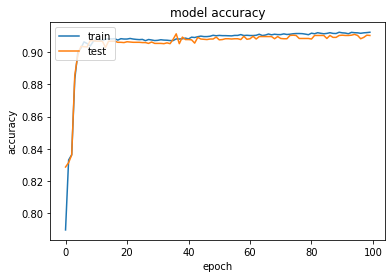

In [31]:

#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


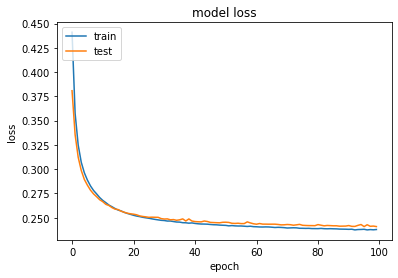

In [32]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [33]:

from keras.layers import Dropout

model = Sequential()
model.add(Dense(78, input_dim = 77, activation="relu", kernel_initializer="normal"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 78)                6084      
_________________________________________________________________
dropout_1 (Dropout)          (None, 78)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 79        
Total params: 6,163
Trainable params: 6,163
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 80, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/80
13727/13727 [==============================] - 2s 165us/step - loss: 34600564.5049 - accuracy: 0.8016 - val_loss: 4085287.2836 - val_accuracy: 0.8710
Epoch 2/80
13727/13727 [==============================] - 1s 102us/step - loss: 29989622.5992 - accuracy: 0.8006 - val_loss: 12442670.1364 - val_accuracy: 0.8144
Epoch 3/80
13727/13727 [==============================] - 1s 99us/step - loss: 36064535.4953 - accuracy: 0.7713 - val_loss: 20194196.2641 - val_accuracy: 0.8032
Epoch 4/80
13727/13727 [==============================] - 1s 99us/step - loss: 16193067.7439 - accuracy: 0.7770 - val_loss: 1505370.1686 - val_accuracy: 0.8232
Epoch 5/80
13727/13727 [==============================] - 1s 99us/step - loss: 21803062.9716 - accuracy: 0.7852 - val_loss: 8747850.6771 - val_accuracy: 0.7908
Epoch 6/80
13727/13727 [==============================] - 1s 102us/step - loss: 8704699.3219 - accuracy: 0.7855 - val_loss: 21897224.8644 - val_acc

13727/13727 [==============================] - 1s 102us/step - loss: 0.5444 - accuracy: 0.7445 - val_loss: 0.5442 - val_accuracy: 0.7458
Epoch 55/80
13727/13727 [==============================] - 1s 105us/step - loss: 0.5473 - accuracy: 0.7444 - val_loss: 0.5442 - val_accuracy: 0.7458
Epoch 56/80
13727/13727 [==============================] - 1s 104us/step - loss: 0.5447 - accuracy: 0.7445 - val_loss: 0.5442 - val_accuracy: 0.7458
Epoch 57/80
13727/13727 [==============================] - 1s 104us/step - loss: 0.5451 - accuracy: 0.7444 - val_loss: 0.5442 - val_accuracy: 0.7458
Epoch 58/80
13727/13727 [==============================] - 1s 104us/step - loss: 0.5448 - accuracy: 0.7445 - val_loss: 0.5442 - val_accuracy: 0.7458
Epoch 59/80
13727/13727 [==============================] - 1s 103us/step - loss: 0.5448 - accuracy: 0.7444 - val_loss: 0.5442 - val_accuracy: 0.7458
Epoch 60/80
13727/13727 [==============================] - 1s 104us/step - loss: 0.5447 - accuracy: 0.7445 - val_loss:

In [35]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(78, input_dim = 77, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="uniform"))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 80, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/80
13727/13727 [==============================] - 2s 146us/step - loss: 11443373.7313 - accuracy: 0.8216 - val_loss: 14781213.0640 - val_accuracy: 0.8494
Epoch 2/80
13727/13727 [==============================] - 1s 94us/step - loss: 23691318.9557 - accuracy: 0.8277 - val_loss: 2417321.9423 - val_accuracy: 0.6436
Epoch 3/80
13727/13727 [==============================] - 1s 90us/step - loss: 16921715.6722 - accuracy: 0.8159 - val_loss: 28331157.0661 - val_accuracy: 0.8676
Epoch 4/80
13727/13727 [==============================] - 1s 87us/step - loss: 16061002.0973 - accuracy: 0.8442 - val_loss: 5757471.2329 - val_accuracy: 0.8817
Epoch 5/80
13727/13727 [==============================] - 1s 83us/step - loss: 3824646.6553 - accuracy: 0.8347 - val_loss: 2846855.8215 - val_accuracy: 0.8591
Epoch 6/80
13727/13727 [==============================] - 1s 84us/step - loss: 5165105.4571 - accuracy: 0.8233 - val_loss: 3041476.3042 - val_accurac

13727/13727 [==============================] - 1s 85us/step - loss: 0.5437 - accuracy: 0.7460 - val_loss: 38.5592 - val_accuracy: 0.7463
Epoch 55/80
13727/13727 [==============================] - 1s 91us/step - loss: 0.5438 - accuracy: 0.7460 - val_loss: 38.5592 - val_accuracy: 0.7463
Epoch 56/80
13727/13727 [==============================] - 1s 97us/step - loss: 0.5438 - accuracy: 0.7460 - val_loss: 38.5592 - val_accuracy: 0.7463
Epoch 57/80
13727/13727 [==============================] - 1s 90us/step - loss: 0.5438 - accuracy: 0.7460 - val_loss: 38.5592 - val_accuracy: 0.7463
Epoch 58/80
13727/13727 [==============================] - 1s 86us/step - loss: 0.5438 - accuracy: 0.7460 - val_loss: 38.5592 - val_accuracy: 0.7463
Epoch 59/80
13727/13727 [==============================] - 1s 89us/step - loss: 0.5438 - accuracy: 0.7460 - val_loss: 38.5592 - val_accuracy: 0.7463
Epoch 60/80
13727/13727 [==============================] - 1s 90us/step - loss: 0.5438 - accuracy: 0.7460 - val_loss: 

In [36]:
model = Sequential()
model.add(Dense(78, input_dim = 77, activation="sigmoid", kernel_initializer="uniform"))
model.add(Dense(32,activation="sigmoid", kernel_initializer="uniform"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="uniform"))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 80, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/80
13727/13727 [==============================] - 3s 197us/step - loss: 0.4934 - accuracy: 0.7767 - val_loss: 0.4385 - val_accuracy: 0.8292
Epoch 2/80
13727/13727 [==============================] - 1s 103us/step - loss: 0.4265 - accuracy: 0.8353 - val_loss: 0.4172 - val_accuracy: 0.8290
Epoch 3/80
13727/13727 [==============================] - 2s 112us/step - loss: 0.4041 - accuracy: 0.8415 - val_loss: 0.3970 - val_accuracy: 0.8433
Epoch 4/80
13727/13727 [==============================] - 1s 105us/step - loss: 0.3861 - accuracy: 0.8532 - val_loss: 0.3783 - val_accuracy: 0.8470
Epoch 5/80
13727/13727 [==============================] - 1s 94us/step - loss: 0.3752 - accuracy: 0.8510 - val_loss: 0.3783 - val_accuracy: 0.8544
Epoch 6/80
13727/13727 [==============================] - 1s 95us/step - loss: 0.3686 - accuracy: 0.8533 - val_loss: 0.3749 - val_accuracy: 0.8542
Epoch 7/80
13727/13727 [==============================] - 1s 94us

13727/13727 [==============================] - 1s 99us/step - loss: 0.3302 - accuracy: 0.8711 - val_loss: 0.3318 - val_accuracy: 0.8702
Epoch 57/80
13727/13727 [==============================] - 1s 98us/step - loss: 0.3293 - accuracy: 0.8708 - val_loss: 0.3316 - val_accuracy: 0.8702
Epoch 58/80
13727/13727 [==============================] - 1s 100us/step - loss: 0.3287 - accuracy: 0.8723 - val_loss: 0.3372 - val_accuracy: 0.8702
Epoch 59/80
13727/13727 [==============================] - 1s 99us/step - loss: 0.3296 - accuracy: 0.8708 - val_loss: 0.3410 - val_accuracy: 0.8705
Epoch 60/80
13727/13727 [==============================] - 1s 99us/step - loss: 0.3291 - accuracy: 0.8711 - val_loss: 0.3319 - val_accuracy: 0.8713
Epoch 61/80
13727/13727 [==============================] - 1s 99us/step - loss: 0.3290 - accuracy: 0.8713 - val_loss: 0.3309 - val_accuracy: 0.8710
Epoch 62/80
13727/13727 [==============================] - 1s 100us/step - loss: 0.3288 - accuracy: 0.8719 - val_loss: 0.33

In [37]:
model = Sequential()
model.add(Dense(78, input_dim = 77, activation="relu", kernel_initializer="uniform"))
model.add(Dense(32,activation="relu", kernel_initializer="uniform"))
model.add(Dense(8, activation="sigmoid", kernel_initializer="uniform"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="uniform"))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 80, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/80
13727/13727 [==============================] - 3s 182us/step - loss: 0.6011 - accuracy: 0.7322 - val_loss: 0.5538 - val_accuracy: 0.7451
Epoch 2/80
13727/13727 [==============================] - 1s 108us/step - loss: 0.5472 - accuracy: 0.7442 - val_loss: 0.5397 - val_accuracy: 0.7451
Epoch 3/80
13727/13727 [==============================] - 1s 108us/step - loss: 0.5386 - accuracy: 0.7442 - val_loss: 0.5341 - val_accuracy: 0.7451
Epoch 4/80
13727/13727 [==============================] - 1s 103us/step - loss: 0.5342 - accuracy: 0.7581 - val_loss: 0.5308 - val_accuracy: 0.7784
Epoch 5/80
13727/13727 [==============================] - 1s 101us/step - loss: 0.5313 - accuracy: 0.7786 - val_loss: 0.5287 - val_accuracy: 0.7784
Epoch 6/80
13727/13727 [==============================] - 2s 109us/step - loss: 0.5294 - accuracy: 0.7786 - val_loss: 0.5272 - val_accuracy: 0.7784
Epoch 7/80
13727/13727 [==============================] - 1s 10

Epoch 56/80
13727/13727 [==============================] - 2s 110us/step - loss: 0.5242 - accuracy: 0.7785 - val_loss: 0.5242 - val_accuracy: 0.7782
Epoch 57/80
13727/13727 [==============================] - 2s 110us/step - loss: 0.5241 - accuracy: 0.7785 - val_loss: 0.5243 - val_accuracy: 0.7782
Epoch 58/80
13727/13727 [==============================] - 2s 110us/step - loss: 0.5242 - accuracy: 0.7785 - val_loss: 0.5241 - val_accuracy: 0.7782
Epoch 59/80
13727/13727 [==============================] - 1s 108us/step - loss: 0.5242 - accuracy: 0.7785 - val_loss: 0.5241 - val_accuracy: 0.7782
Epoch 60/80
13727/13727 [==============================] - 1s 108us/step - loss: 0.5241 - accuracy: 0.7785 - val_loss: 0.5241 - val_accuracy: 0.7782
Epoch 61/80
13727/13727 [==============================] - 1s 109us/step - loss: 0.5241 - accuracy: 0.7785 - val_loss: 0.5241 - val_accuracy: 0.7782
Epoch 62/80
13727/13727 [==============================] - 1s 108us/step - loss: 0.5241 - accuracy: 0.7785

In [38]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(80, input_dim = 77, activation="sigmoid", kernel_initializer="uniform"))
model.add(Dense(32, input_dim = 77, activation="sigmoid", kernel_initializer="uniform"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="uniform"))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 80, validation_data=(X_test,y_test))

Train on 13727 samples, validate on 5884 samples
Epoch 1/80
13727/13727 [==============================] - 2s 165us/step - loss: 0.4921 - accuracy: 0.7761 - val_loss: 0.4343 - val_accuracy: 0.8227
Epoch 2/80
13727/13727 [==============================] - 1s 101us/step - loss: 0.4226 - accuracy: 0.8204 - val_loss: 0.4084 - val_accuracy: 0.8277
Epoch 3/80
13727/13727 [==============================] - 1s 99us/step - loss: 0.3997 - accuracy: 0.8303 - val_loss: 0.3931 - val_accuracy: 0.8292
Epoch 4/80
13727/13727 [==============================] - 1s 93us/step - loss: 0.3849 - accuracy: 0.8445 - val_loss: 0.3769 - val_accuracy: 0.8448
Epoch 5/80
13727/13727 [==============================] - 1s 103us/step - loss: 0.3757 - accuracy: 0.8460 - val_loss: 0.3709 - val_accuracy: 0.8460
Epoch 6/80
13727/13727 [==============================] - 1s 97us/step - loss: 0.3717 - accuracy: 0.8456 - val_loss: 0.3685 - val_accuracy: 0.8464
Epoch 7/80
13727/13727 [==============================] - 1s 98us/

13727/13727 [==============================] - 1s 105us/step - loss: 0.3460 - accuracy: 0.8536 - val_loss: 0.3451 - val_accuracy: 0.8550
Epoch 57/80
13727/13727 [==============================] - 1s 106us/step - loss: 0.3467 - accuracy: 0.8547 - val_loss: 0.3453 - val_accuracy: 0.8550
Epoch 58/80
13727/13727 [==============================] - 1s 103us/step - loss: 0.3459 - accuracy: 0.8562 - val_loss: 0.3454 - val_accuracy: 0.8554
Epoch 59/80
13727/13727 [==============================] - 1s 105us/step - loss: 0.3471 - accuracy: 0.8524 - val_loss: 0.3469 - val_accuracy: 0.8550
Epoch 60/80
13727/13727 [==============================] - 1s 103us/step - loss: 0.3465 - accuracy: 0.8533 - val_loss: 0.3468 - val_accuracy: 0.8566
Epoch 61/80
13727/13727 [==============================] - 1s 103us/step - loss: 0.3455 - accuracy: 0.8542 - val_loss: 0.3443 - val_accuracy: 0.8566
Epoch 62/80
13727/13727 [==============================] - 1s 104us/step - loss: 0.3460 - accuracy: 0.8536 - val_loss: